<b>Importing the required libraries</b> <br><br>
*Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays. <br>
*NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('dataset_1.csv')
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,Yes,Yes,No,Yes,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,Yes,Yes,No,Yes,5000
2,Apple,iPhone 4S,16.0,1.0,iOS,3.5,No,No,No,No,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,No,No,No,No,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,Yes,No,No,No,5000


In [44]:
df.describe()

,ROM,RAM,Screen size,Price
count,26128.000000,40024.000000,40024.000000,40024.000000
mean,103.546846,3.399626,5.718886,52590.152159
std,81.175279,1.827558,0.740893,52133.221632
min,8.000000,0.004000,0.500000,5000.000000
25%,64.000000,2.000000,5.000000,22045.000000
50%,64.000000,3.000000,5.900000,35000.000000
75%,128.000000,4.000000,6.400000,59900.000000
max,1024.000000,12.000000,7.600000,620000.000000


There are 40023 rows of data after initial data cleaning steps. 
Also, there are 11 columns which include 10 features and the price.
We can process the data further to explore the relationships among features and to extract the important information.

<b>Handling the missing data</b> <br><br>
Filling the missing values in the ROM column.
Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. 
But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value. We have used the nearest method since the rows are sorted in the ascending order. The ROM values can assume to take the value of its nearest member in the forward direction.

In [6]:
df = df.interpolate(method ='nearest', limit_direction ='forward')

In [7]:
df.describe()

,ROM,RAM,Screen size,Price
count,40024.000000,40024.000000,40024.000000,40024.000000
mean,99.223466,3.399626,5.718886,52590.152159
std,78.349033,1.827558,0.740893,52133.221632
min,8.000000,0.004000,0.500000,5000.000000
25%,32.000000,2.000000,5.000000,22045.000000
50%,64.000000,3.000000,5.900000,35000.000000
75%,128.000000,4.000000,6.400000,59900.000000
max,1024.000000,12.000000,7.600000,620000.000000


Earlier the ROM column contained only 26127 values. <br> After filling the missing data now it contains values for all the 40023 rows.

In [8]:
df.describe(include="object")

,Brand,Model,OS,Dual Sim,Expandable Memory,5G,Fingerprint Sensor
count,40024,40024,40024,40024,40024,40024,40024
unique,17,601,5,2,2,2,2
top,Apple,iPhone 7,Android,No,No,No,Yes
freq,18751,3850,21242,23936,22507,39326,21771


In [9]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND :  17
Apple         18751
Samsung        8716
Huawei         3027
Xiaomi         2941
Sony           2301
Oppo           1264
Vivo            797
Nokia           639
LG              561
OnePlus         342
Realme          315
Google          147
Infinix         114
HTC              61
BlackBerry       17
Asus             17
Greentel         14
Name: Brand, dtype: int64


*******************************************************


MODEL :  601
iPhone 7              3850
iPhone 7 Plus         2883
iPhone 6S             2401
iPhone X              1352
iPhone 8               989
                      ... 
G20                      1
X500                     1
Xperia XZ2 Compact       1
6i                       1
One E9                   1
Name: Model, Length: 601, dtype: int64


*******************************************************


OS :  5
Android          21242
iOS              18751
BlackBerry OS       17
Other               11
Symbian OS           3
Name: OS, dtype: int64


*****

In [10]:
df.nunique()

Brand                   17
Model                  601
ROM                      8
RAM                     17
OS                       5
Screen size             42
Dual Sim                 2
Expandable Memory        2
5G                       2
Fingerprint Sensor       2
Price                 2051
dtype: int64

## Data Visualization

In [11]:
df["Dual Sim"] = df["Dual Sim"].replace(["Yes","No"],[1,0])
df["Expandable Memory"] = df["Expandable Memory"].replace(["Yes","No"],[1,0])
df["5G"] = df["5G"].replace(["Yes","No"],[1,0])
df["Fingerprint Sensor"] = df["Fingerprint Sensor"].replace(["Yes","No"],[1,0])

In [12]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,1.0,iOS,3.5,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,1,0,0,0,5000


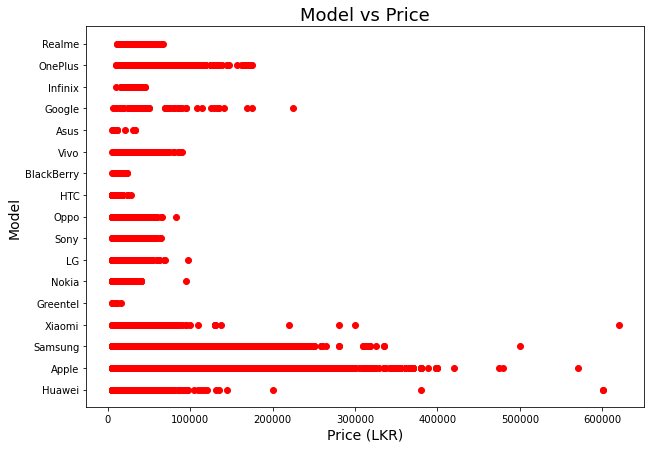

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df["Price"], df["Brand"], color="red")
plt.title("Model vs Price", fontsize = 18)
plt.xlabel("Price (LKR)", fontsize = 14)
plt.ylabel("Model", fontsize = 14)
plt.show()


### Features vs Target Variable

Text(0, 0.5, 'Sum of the Prices')

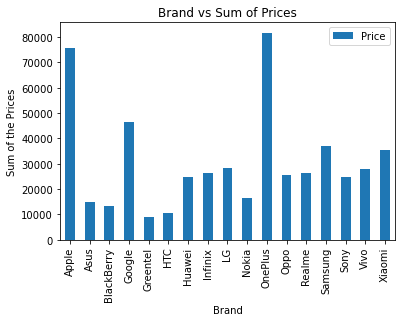

In [38]:
#add mean
(df.groupby('Brand')['Price'].mean()).plot(kind="bar",legend = True)
plt.title('Brand vs Sum of Prices')
plt.xlabel("Brand")
plt.ylabel("Sum of the Prices")

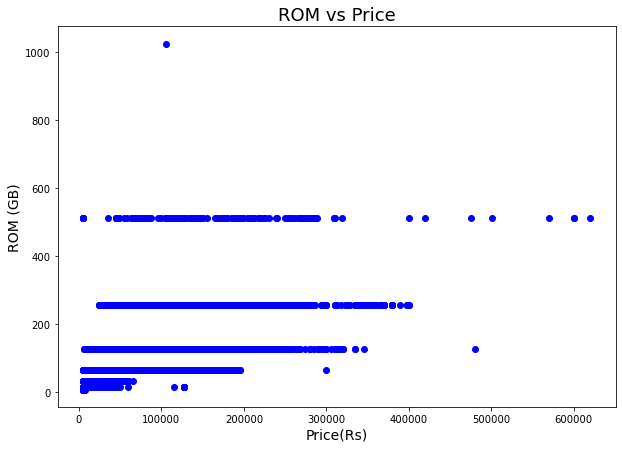

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(df["Price"], df["ROM"], color="blue")
plt.title("ROM vs Price", fontsize = 18)
plt.xlabel("Price(Rs)", fontsize = 14)
plt.ylabel("ROM (GB)", fontsize = 14)
plt.show()

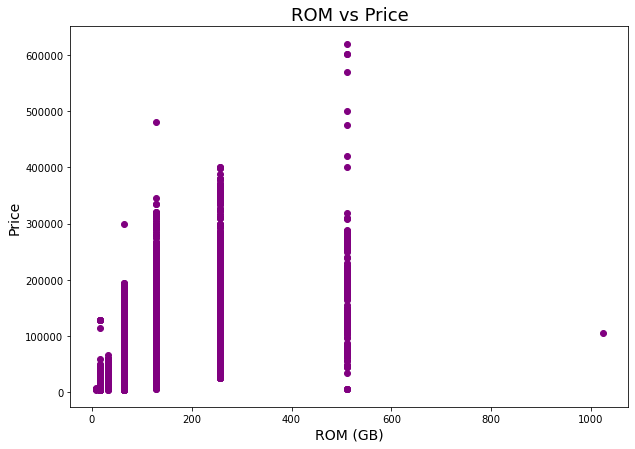

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(df["ROM"], df["Price"], color="purple")
plt.title("ROM vs Price", fontsize = 18)
plt.xlabel("ROM (GB)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

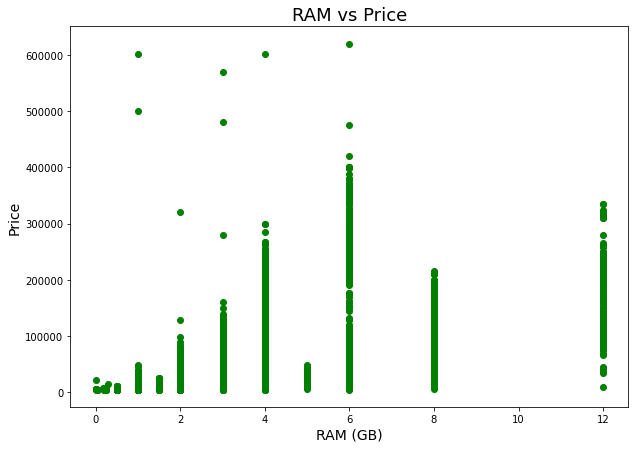

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(df["RAM"], df["Price"], color="green")
plt.title("RAM vs Price", fontsize = 18)
plt.xlabel("RAM (GB)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

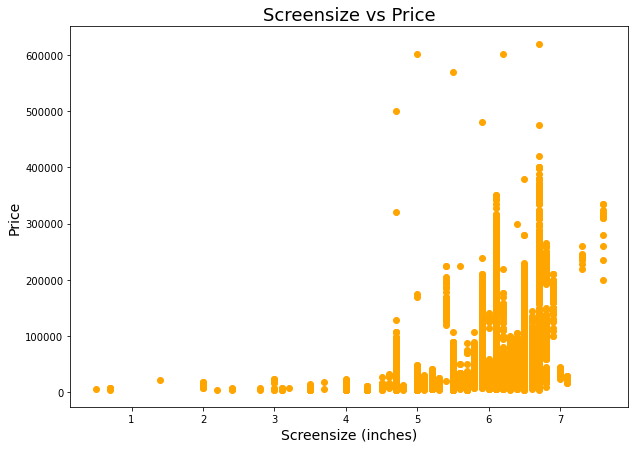

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(df["Screen size"], df["Price"], color="orange")
plt.title("Screensize vs Price", fontsize = 18)
plt.xlabel("Screensize (inches)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

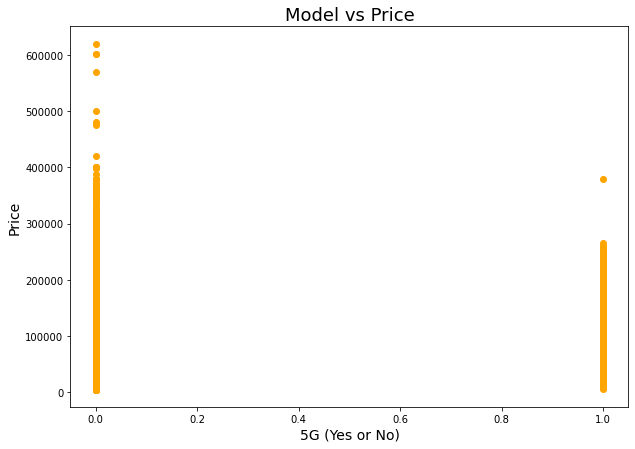

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(df["5G"], df["Price"], color="orange")
plt.title("Model vs Price", fontsize = 18)
plt.xlabel("5G (Yes or No)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Brand'>

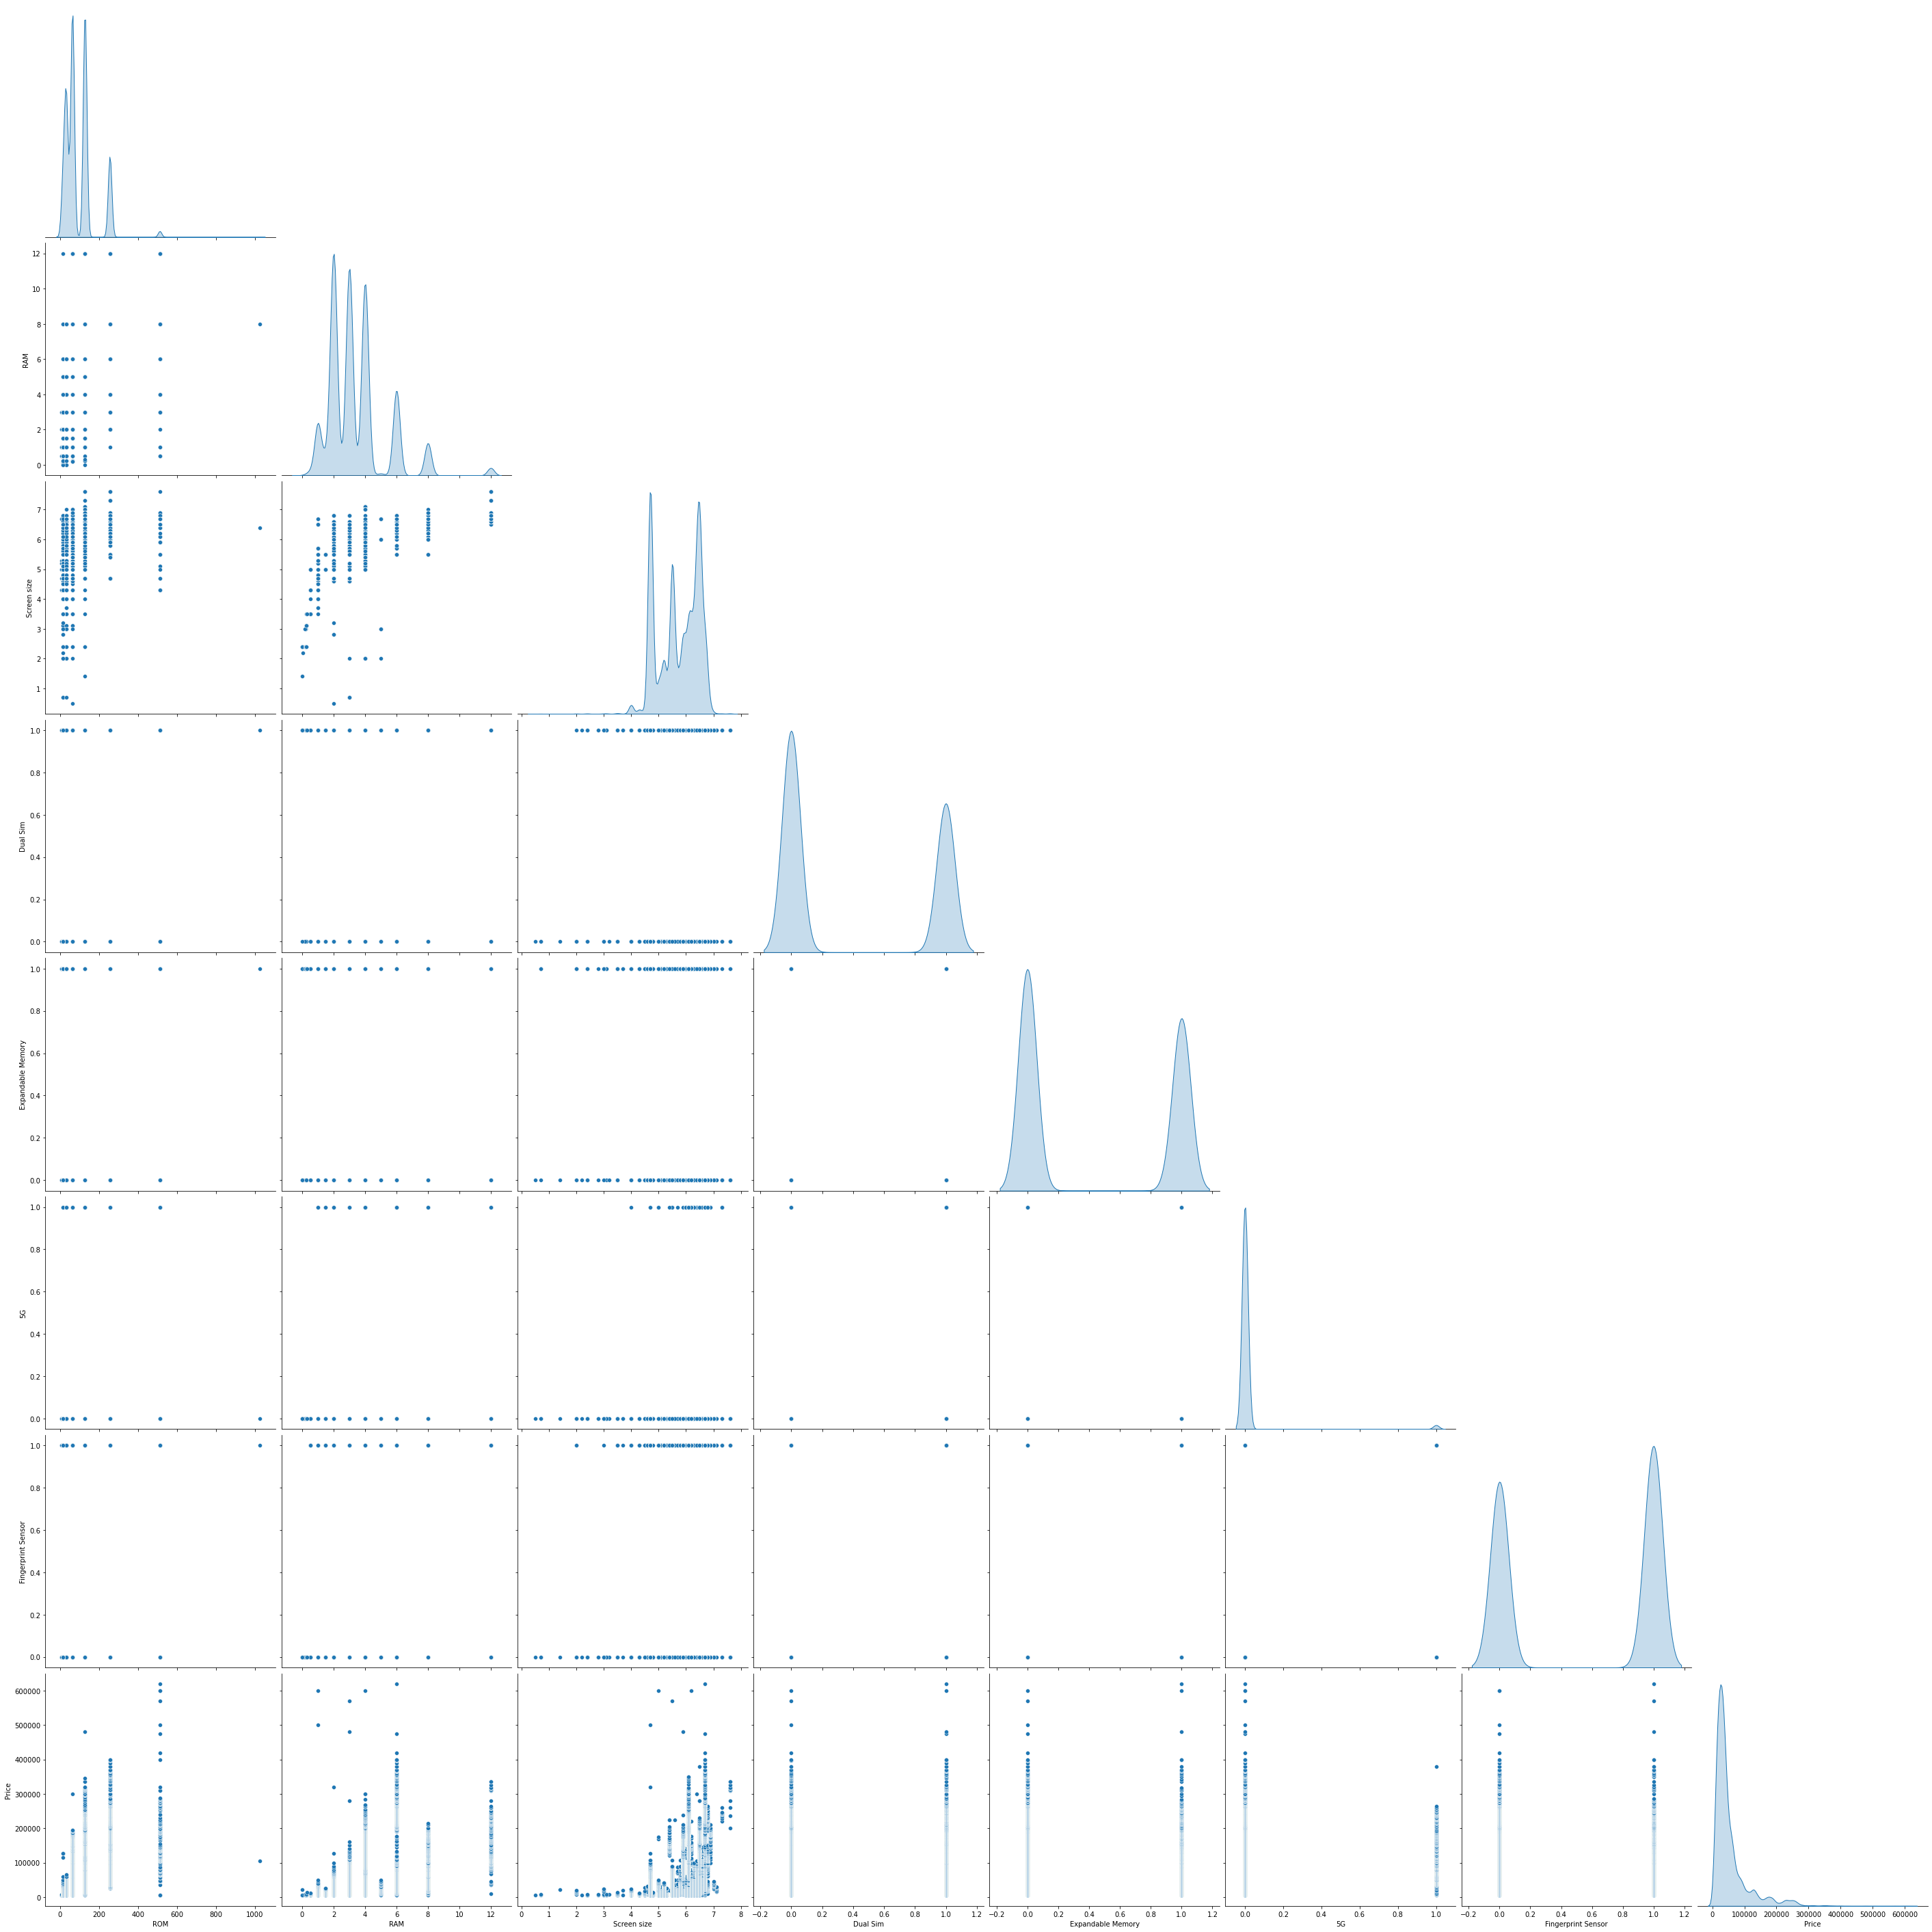

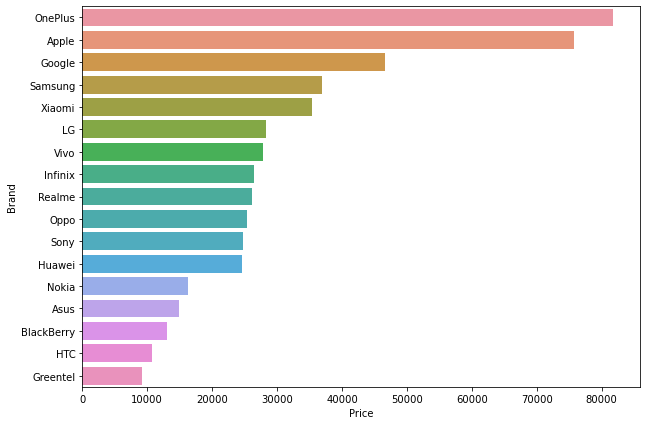

In [21]:
sns.pairplot(df, height=5, diag_kind="kde", corner=True)
plt.figure(figsize=(10,7))
sns.barplot(
    y=df["Brand"],
    x=df["Price"],    ci=False,
    order=df.groupby("Brand").mean()["Price"].sort_values(ascending=False).index,
)

<AxesSubplot:xlabel='ROM', ylabel='Price'>

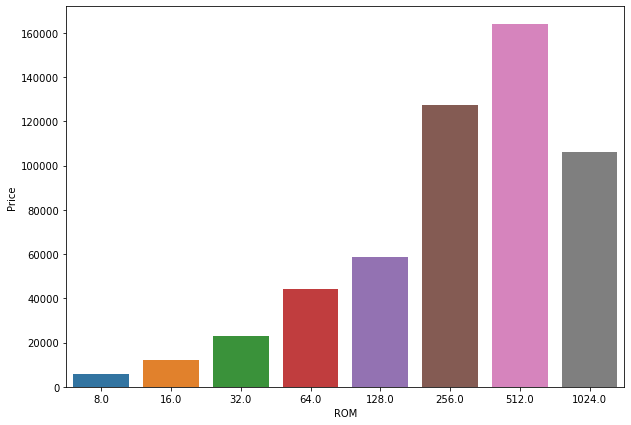

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(
    x=df["ROM"],
    y=df["Price"],
    ci=False,
    order=df.groupby("ROM").mean()["Price"].index,
)

<AxesSubplot:xlabel='RAM', ylabel='Price'>

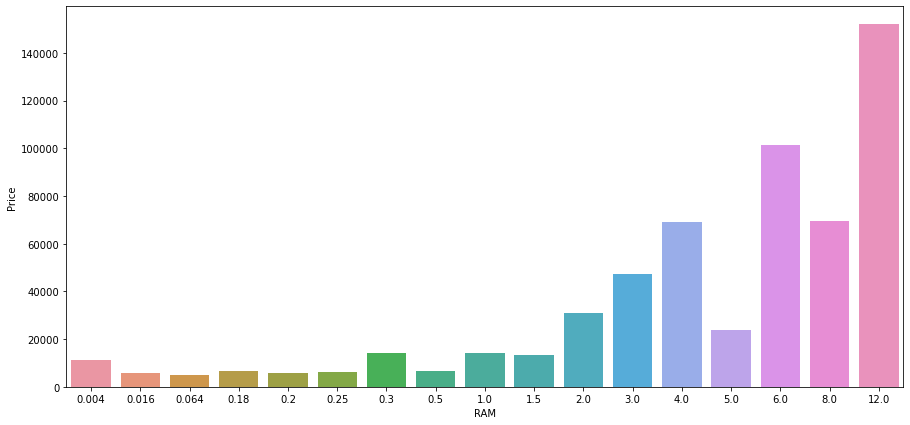

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["RAM"],
    y=df["Price"],
    ci=False,
    order=df.groupby("RAM").mean()["Price"].index,
    linewidth=1
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '0.5'),
  Text(1, 0, '0.7'),
  Text(2, 0, '1.4'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.2'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.8'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.1'),
  Text(9, 0, '3.2'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.7'),
  Text(12, 0, '4.0'),
  Text(13, 0, '4.3'),
  Text(14, 0, '4.5'),
  Text(15, 0, '4.6'),
  Text(16, 0, '4.7'),
  Text(17, 0, '4.8'),
  Text(18, 0, '5.0'),
  Text(19, 0, '5.1'),
  Text(20, 0, '5.2'),
  Text(21, 0, '5.3'),
  Text(22, 0, '5.4'),
  Text(23, 0, '5.5'),
  Text(24, 0, '5.6'),
  Text(25, 0, '5.7'),
  Text(26, 0, '5.8'),
  Text(27, 0, '5.9'),
  Text(28, 0, '6.0'),
  Text(29, 0, '6.1'),
  Text(30, 0, '6.2'),
  Text(31, 0, '6.3'),
  Text(32, 0, '6.4'),
  Text(33, 0, '6.5'),
  Text(34, 0, '6.6'),
  Text(35, 0, '6.7'),
  Text(36, 0, '6.8'),
  

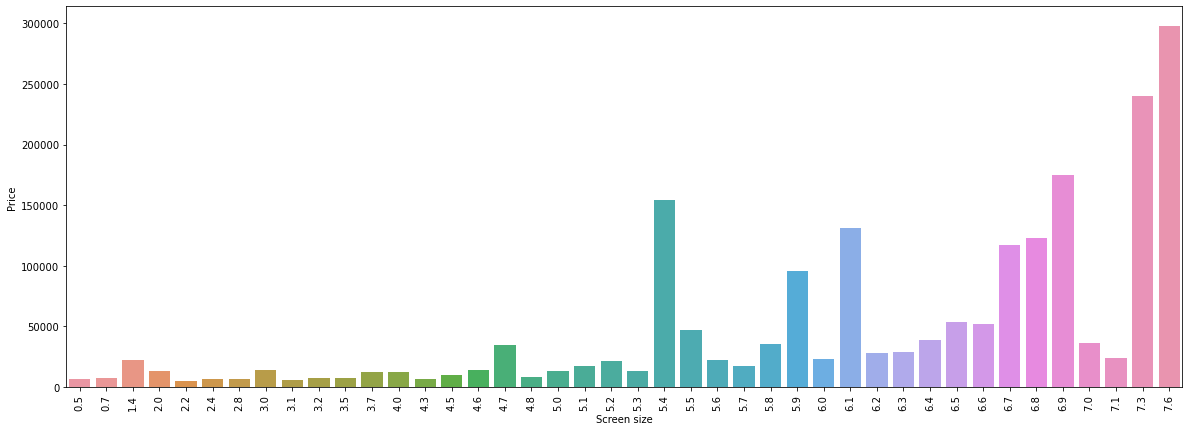

In [24]:
plt.figure(figsize=(20,7))
sns.barplot(
    x=df["Screen size"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Screen size").mean()["Price"].index,
    linewidth=2
)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Dual Sim', ylabel='Price'>

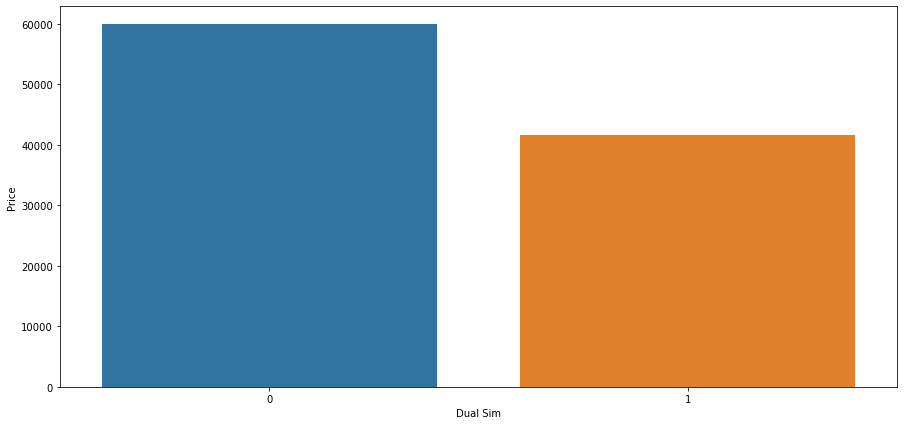

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["Dual Sim"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Dual Sim").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='5G', ylabel='Price'>

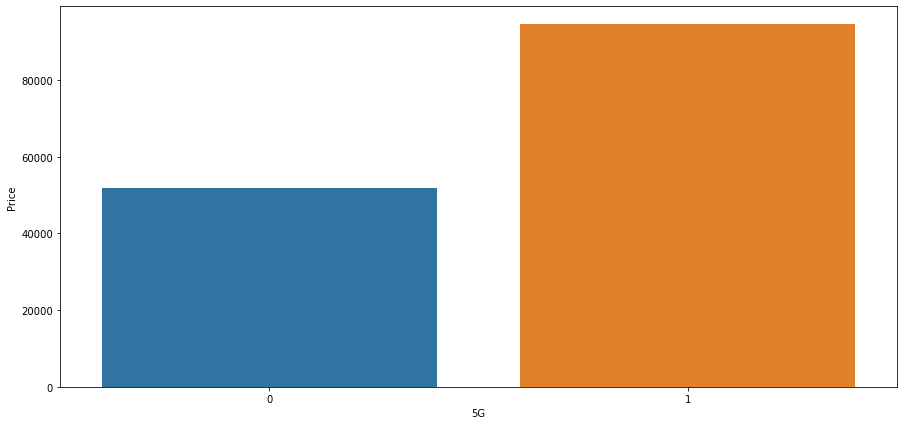

In [26]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["5G"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Dual Sim").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Fingerprint Sensor', ylabel='Price'>

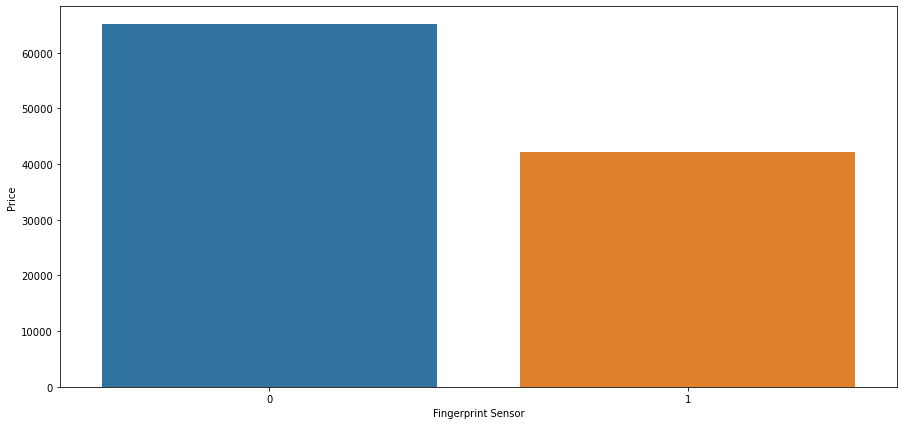

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=df["Fingerprint Sensor"],
    y=df["Price"],
    ci=False,
    order=df.groupby("Dual Sim").mean()["Price"].index,
    linewidth=1
)

<AxesSubplot:xlabel='Brand'>

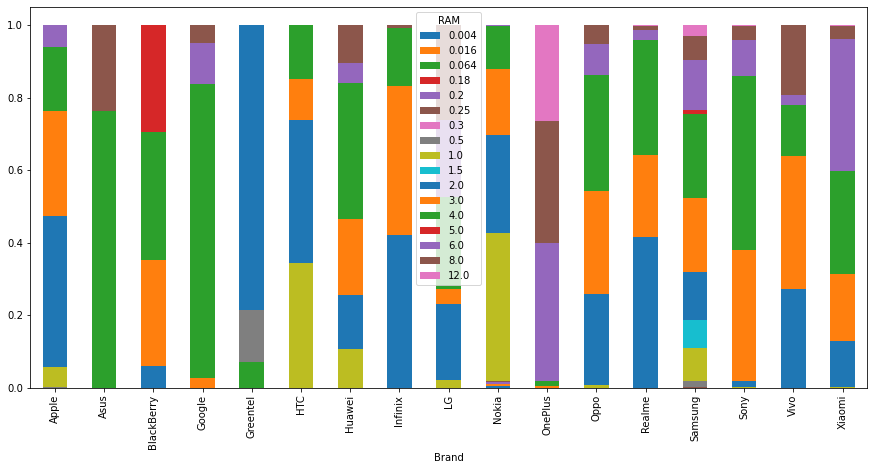

In [28]:
pd.crosstab(df["Brand"], df["RAM"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(15,7)
)

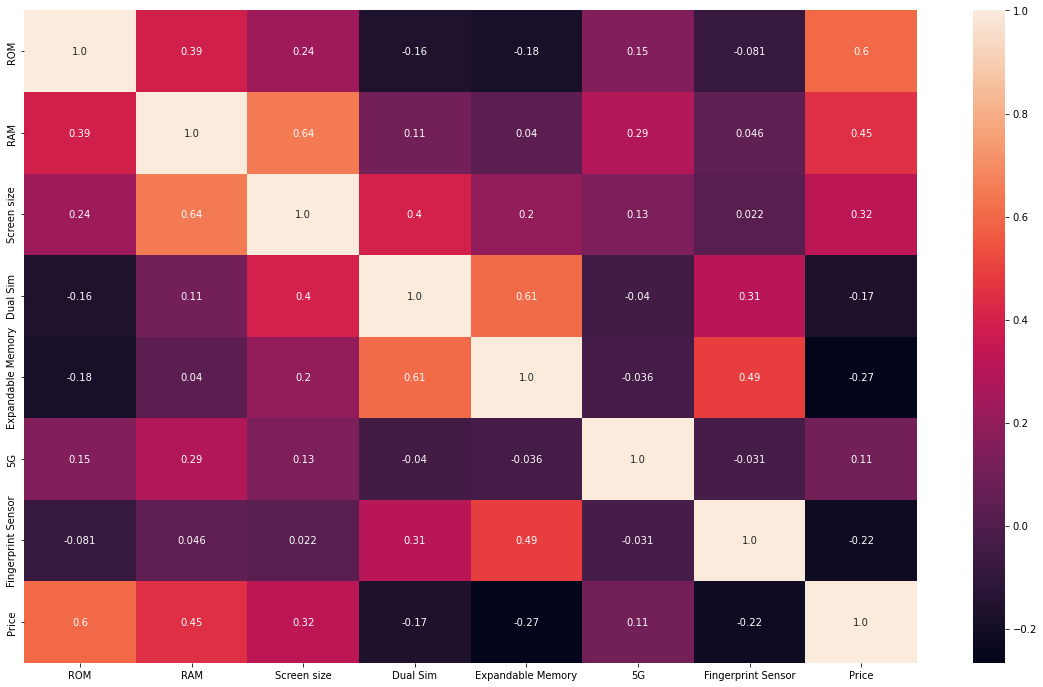

In [29]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

In [30]:
df.describe()

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
count,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000,40024.000000
mean,99.223466,3.399626,5.718886,0.401959,0.437662,0.017440,0.543949,52590.152159
std,78.349033,1.827558,0.740893,0.490300,0.496105,0.130904,0.498071,52133.221632
min,8.000000,0.004000,0.500000,0.000000,0.000000,0.000000,0.000000,5000.000000
25%,32.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,22045.000000
50%,64.000000,3.000000,5.900000,0.000000,0.000000,0.000000,1.000000,35000.000000
75%,128.000000,4.000000,6.400000,1.000000,1.000000,0.000000,1.000000,59900.000000
max,1024.000000,12.000000,7.600000,1.000000,1.000000,1.000000,1.000000,620000.000000


In [31]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,1.0,iOS,3.5,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,1,0,0,0,5000


In [32]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

BRAND :  17
Apple         18751
Samsung        8716
Huawei         3027
Xiaomi         2941
Sony           2301
Oppo           1264
Vivo            797
Nokia           639
LG              561
OnePlus         342
Realme          315
Google          147
Infinix         114
HTC              61
BlackBerry       17
Asus             17
Greentel         14
Name: Brand, dtype: int64


*******************************************************


MODEL :  601
iPhone 7              3850
iPhone 7 Plus         2883
iPhone 6S             2401
iPhone X              1352
iPhone 8               989
                      ... 
G20                      1
X500                     1
Xperia XZ2 Compact       1
6i                       1
One E9                   1
Name: Model, Length: 601, dtype: int64


*******************************************************


OS :  5
Android          21242
iOS              18751
BlackBerry OS       17
Other               11
Symbian OS           3
Name: OS, dtype: int64


*****

## Distribution & Outliers

In [33]:
df.columns

Index(['Brand', 'Model', 'ROM', 'RAM', 'OS', 'Screen size', 'Dual Sim',
       'Expandable Memory', '5G', 'Fingerprint Sensor', 'Price'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

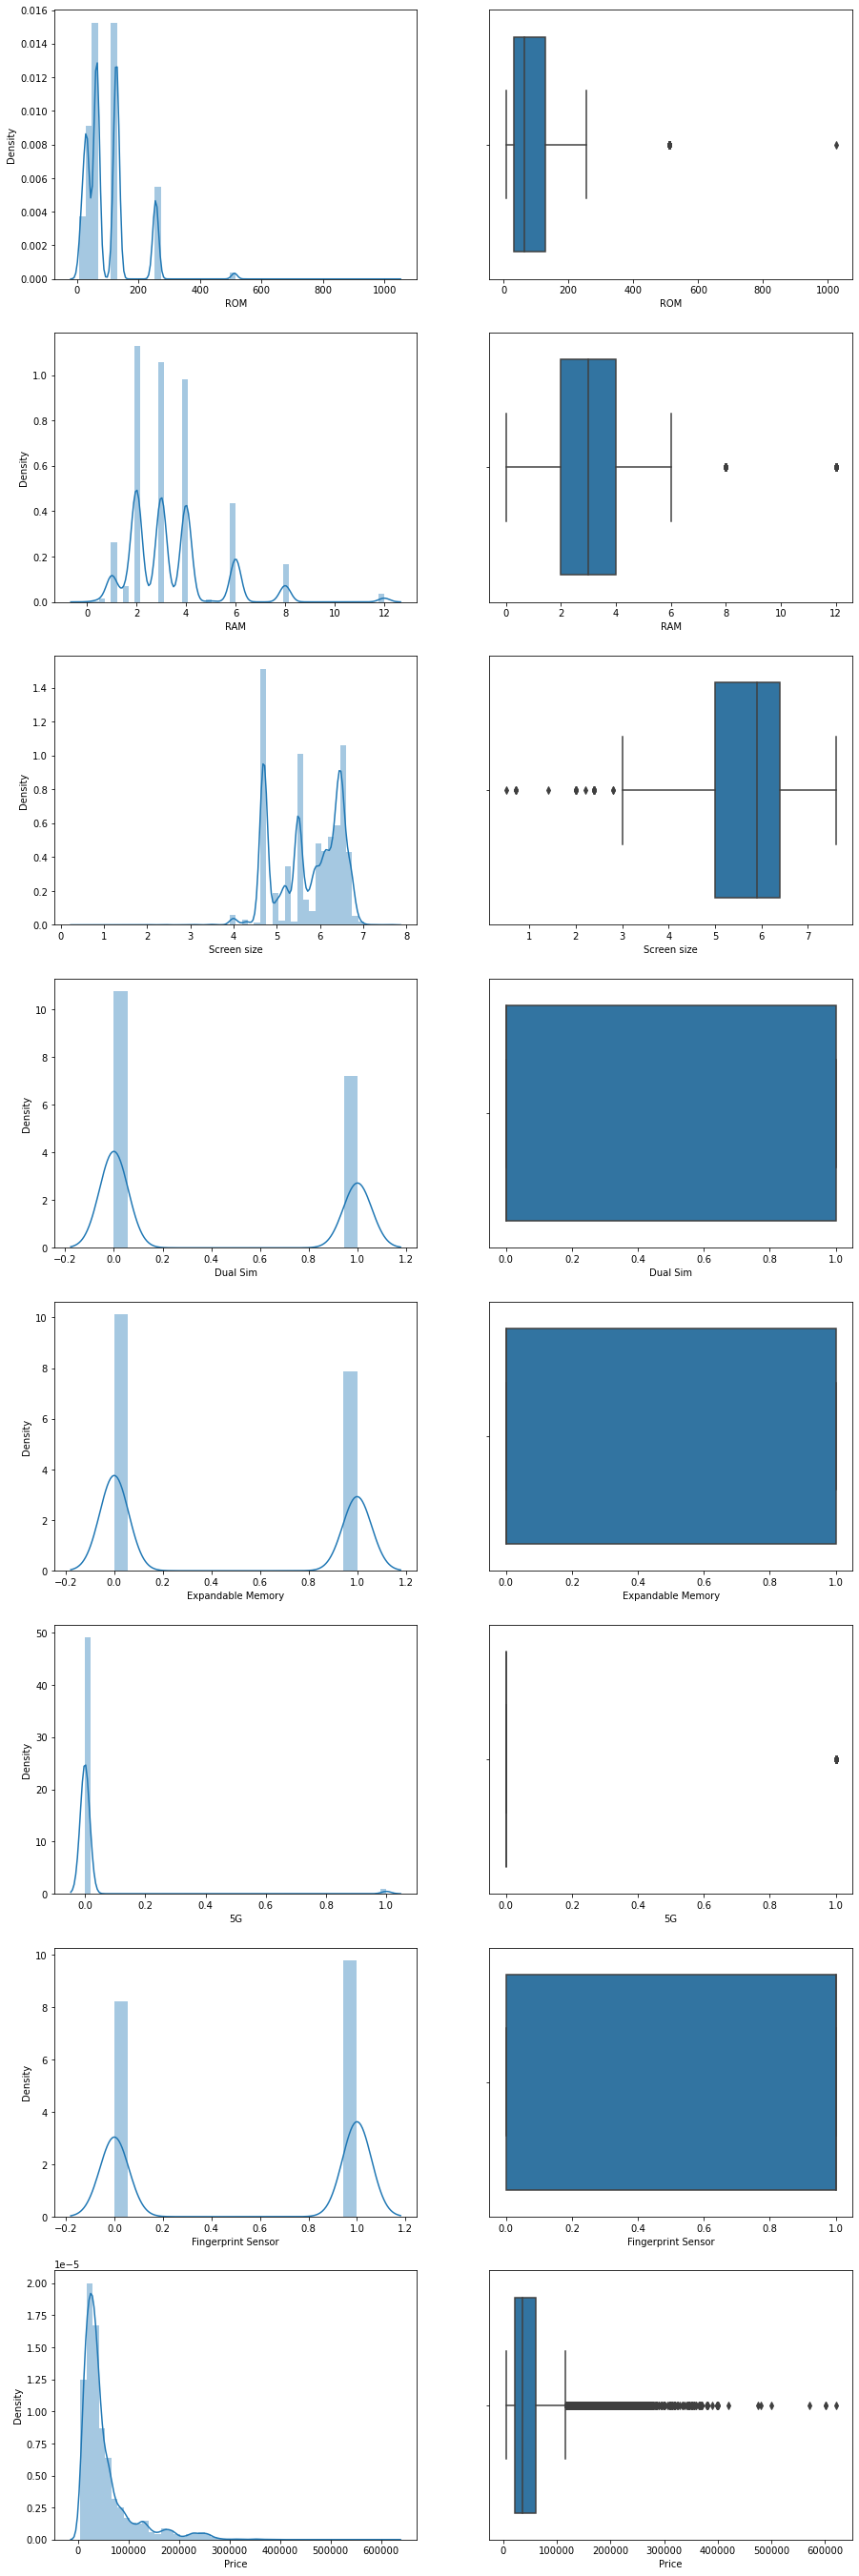

In [34]:
a=1
plt.figure(figsize=(15,80))
for i in df[
    [
      'Brand', 'Model', 'ROM', 'RAM', 'OS', 'Screen size', 'Dual Sim',
       'Expandable Memory', '5G', 'Fingerprint Sensor', 'Price',  
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13,2,a)
        sns.distplot(df[i])
        plt.subplot(13,2,a+1)
        sns.boxplot(df[i])
        a +=2

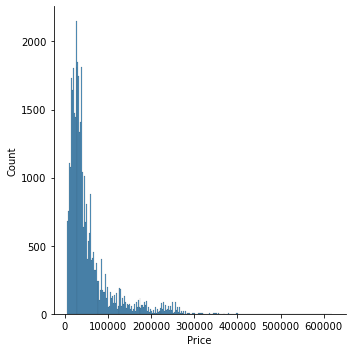

In [35]:

sns.displot(data=df, x="Price")

<Figure size 1296x504 with 0 Axes>

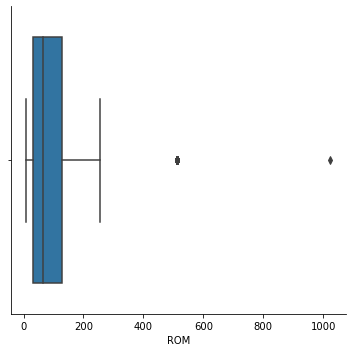

In [36]:
plt.figure(figsize=(18,7))
sns.catplot(data=df, x="ROM", kind="box")